# Double Pendulum

Basado en el documento en linea [EL Péndulo doble - De la Universidad de Pais Vasco](http://www.sc.ehu.es/sbweb/fisica/oscilaciones/pendulo_doble/pendulo_doble.htm) 
y [Double Pendulum](http://sophia.dtp.fmph.uniba.sk/~kovacik/doublePendulum.pdf)

El péndulo doble se  estudia un sistema de dos osciladores acoplados. se va a resolver las ecuaciones del movimiento, a calcular las frecuencias de los modos normales de oscilación, y las condiciones iniciales que hacen que el sistema describa un modo normal de oscilación.

<img src="http://mw.concord.org/modeler1.3/mirror/mechanics/doublependulum.gif"/>

El péndulo doble como se muestra en la siguiente figura, está formado por dos péndulos simples de longitudes $l1$ y $l2$, de los que cuelgan partículas de masas $m1$ y $m2$.  En un instante determinado $t$, los hilos inextensibles forman ángulos $θ1$ y $θ2$ con la vertical.


<img src="http://www.sc.ehu.es/sbweb/fisica/oscilaciones/pendulo_doble/doble_1.gif"/>



In [3]:
import sympy as sym
from sympy import *
import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sys
import os
from scipy.integrate import ode
from IPython.display import HTML
%matplotlib inline

init_printing(use_latex=True)

In [45]:
theta = sym.Function('theta')
phi = sym.Function('phi')
x = sym.Function('x')
y = sym.Function('y')
t,L1,L2,m1,m2,g = sym.symbols('t L1 L2 m1 m2 g')

In [3]:
x1 = L1*sym.sin(theta(t))
x2 = x1 + L2*sym.sin(phi(t))
y1 = -L1*sym.cos(theta(t))
y2 = y1 - L2*sym.cos(phi(t))

**Gráfica de la posición y angulos utilizados**
<img src="imgs/grafPendulum.JPG"/>

In [4]:
P = m1*g*y1 + m2*g*y2
print("Ecuación para la energía potencial")
(P)

Ecuación para la energía potencial


**Ecuación para la energía cinética**
<img src="imgs/energiaCinetica.JPG"/>

El Lagrangiano (L) de un sistema está definido por la diferencia entre energía cinética y energía potencial


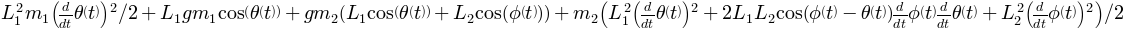

In [5]:
K = ((m1/2)*(sym.diff(x1,t)**2+sym.diff(y1,t)**2)) + ((m2/2)*(sym.diff(x2,t)**2 + sym.diff(y2,t)**2))
print("El Lagrangiano (L) de un sistema está definido por la diferencia entre energía cinética y energía potencial")
L = K-P
sym.simplify(L)

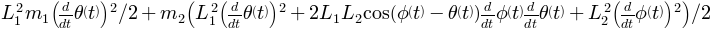

In [6]:
sym.simplify(K)

El teorema general de la conservación de la energía es la expresión Euler-Lagrange:
$$\frac{d}{dt} (\frac{\partial L }{\partial \dotθ_1} )= \frac{\partial L }{\partial θ_1}$$


<img src="imgs/equation1.JPG"/>

Y remplazando por la ecuación Euler-lagrange
<img src="imgs/eq1.JPG"/>

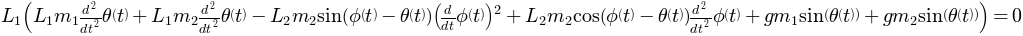

In [7]:
Eq1 = sym.diff(L,sym.diff(theta(t),t),t)-sym.diff(L,theta(t)) 
Eq1 = sym.Eq(Eq1,0)
sym.simplify(Eq1)

Simplificando y resolviendo por $θ_1$
<img src="imgs/theta1.JPG"/>

In [8]:
%%time
theta2=sym.solvers.solve([Eq1],[sym.diff(theta(t),t,t)])

CPU times: user 4.72 s, sys: 0 ns, total: 4.72 s
Wall time: 4.69 s


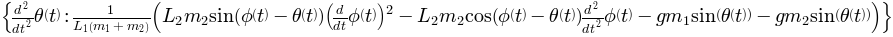

In [9]:
sym.simplify(theta2)

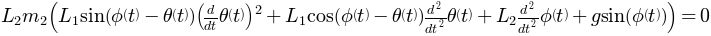

In [10]:
Eq2 = sym.diff(L,sym.diff(phi(t),t),t)-sym.diff(L,phi(t)) #sym.diff(L,phi(t),2,t) - sym.diff(L,phi(t))
Eq2 = sym.Eq(Eq2,0)
sym.simplify(Eq2)

Simplificando y resolviendo por $θ_2$
<img src="imgs/theta2.JPG"/>

In [11]:
%%time
phi2 = sym.solvers.solve([Eq2],[sym.diff(phi(t),t,t)])

CPU times: user 2.73 s, sys: 24 ms, total: 2.75 s
Wall time: 2.73 s


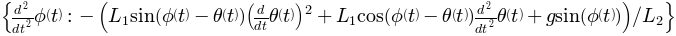

In [12]:
sym.simplify(phi2)

Saco las ecuaciones del tipo de dato DICT para poderlo manipular, luego de eso sustituyo las variables de las velocidades del angulo y por ultimo para poder resolver las ecuaciones de movimiento, genero 4 ecuaciones de primer orden, en vez de 2 ecuaciones de segundo orden [info](http://home2.fvcc.edu/~dhicketh/DiffEqns/spring09projects/LauraStickel/Double%20Pendulum.pdf)

In [13]:
#saco el dato del tipo de dato DICT
diffTheta2 = theta2[sym.diff(theta(t),t,t)]
diffPhi2 = phi2[sym.diff(phi(t),t,t)]

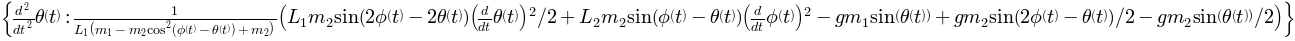

In [14]:
#sustituyo en diffPhi2 en diffTheta2 y luego resuelvo
diffTheta3 = sym.Eq(diffTheta2,sym.diff(theta(t),t,t))
diffTheta2IN = diffTheta3.subs({(sym.diff(phi(t),t,t)): diffPhi2})
p3 = sym.solvers.solve([diffTheta2IN],[sym.diff(theta(t),t,t)])
sym.simplify(p3)

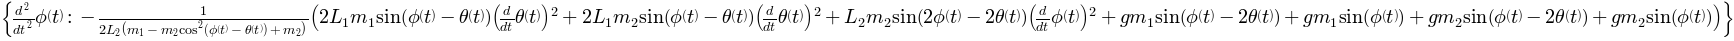

In [15]:
#sustituyo en diffTheta2 en diffPhi2 y luego resuelvo
diffPhi3 = sym.Eq(diffPhi2,sym.diff(phi(t),t,t))
diffPhi2IN = diffPhi3.subs({(sym.diff(theta(t),t,t)): diffTheta2})
p4 = sym.solvers.solve([diffPhi2IN],[sym.diff(phi(t),t,t)])
sym.simplify(p4)

In [17]:
#saco el dato del tipo de dato DICT
p3_eq = p3[sym.diff(theta(t),t,t)]
p4_eq = p4[sym.diff(phi(t),t,t)]

In [46]:
#defino las variables iniciales
lon1 = 1.0 
lon2 = 1.0
ma1 = 1.0 
ma2 = 2.0
gr  = 9.8 
args = [lon1,lon2,ma1,ma2,gr]
time = [0.0,15.0,0.1] # inicio, final, dt
ic   = [np.pi, 0.9*np.pi, 0.0, 0.0] # pocision inicial

Pimero veo si es posible encontrar una solución *analítica* con dsolve

In [47]:
dsolve((p3_eq,p4_eq,))

NotImplementedError: 

Separo las dos ecuaciones de 2do orden en catro ecuaciones de 1er orden $p, q , \frac{dp}{dt}, \frac{dq}{dt}$

Al intentar resolverla por el software **Maple** muestra los tipos de solver que utiliza, donde finalmente no encuentra una solución:

    Methods for second order ODEs:
    --- Trying classification methods ---
    trying 2nd order Liouville
    trying 2nd order WeierstrassP
    trying 2nd order JacobiSN
    differential order: 2; trying a linearization to 3rd order
    trying 2nd order ODE linearizable_by_differentiation
    trying 2nd order, 2 integrating factors of the form mu(x,y)
    trying differential order: 2; missing variables
    trying 2nd order, integrating factors of the form mu(x,y)/(y')^n, only the singular cases
    trying symmetries linear in x and y(x)
    trying differential order: 2; exact nonlinear
    trying 2nd order, integrating factor of the form mu(y')
    trying 2nd order, integrating factor of the form mu(x,y')
    trying 2nd order, integrating factor of the form mu(x,y)/(y')^n, only the general case
    trying 2nd order, integrating factor of the form mu(y,y')
    trying differential order: 2; mu polynomial in y'
    trying 2nd order, integrating factor of the form mu(x,y)
    differential order: 2; looking for linear symmetries
    trying 2nd order, integrating factor of the form mu(x,y)/(y')^n, only the general case
    --- Trying Lie symmetry methods, 2nd order ---
     -> Computing symmetries using: way = 3
     -> Computing symmetries using: way = 5
     -> Computing symmetries using: way = patterns
    Methods for second order ODEs:
    --- Trying classification methods ---
    trying 2nd order Liouville
    trying 2nd order WeierstrassP
    trying 2nd order JacobiSN
    differential order: 2; trying a linearization to 3rd order
    trying 2nd order ODE linearizable_by_differentiation
    trying 2nd order, 2 integrating factors of the form mu(x,y)
    trying differential order: 2; missing variables
    trying 2nd order, integrating factors of the form mu(x,y)/(y')^n, only the singular cases
    trying symmetries linear in x and y(x)
    trying differential order: 2; exact nonlinear
    trying 2nd order, integrating factor of the form mu(y')
    trying 2nd order, integrating factor of the form mu(x,y')
    trying 2nd order, integrating factor of the form mu(x,y)/(y')^n, only the general case
    trying 2nd order, integrating factor of the form mu(y,y')
    trying differential order: 2; mu polynomial in y'
    trying 2nd order, integrating factor of the form mu(x,y)
    differential order: 2; looking for linear symmetries
    trying 2nd order, integrating factor of the form mu(x,y)/(y')^n, only the general case
    --- Trying Lie symmetry methods, 2nd order ---
     -> Computing symmetries using: way = 3
     -> Computing symmetries using: way = 5
     -> Computing symmetries using: way = patterns
    Methods for second order ODEs:
    --- Trying classification methods ---
    trying 2nd order Liouville
    trying 2nd order WeierstrassP
    trying 2nd order JacobiSN
    differential order: 2; trying a linearization to 3rd order
    trying 2nd order ODE linearizable_by_differentiation
    trying 2nd order, 2 integrating factors of the form mu(x,y)
    trying differential order: 2; missing variables
    trying 2nd order, integrating factors of the form mu(x,y)/(y')^n, only the singular cases
    trying symmetries linear in x and y(x)
    trying differential order: 2; exact nonlinear
    trying 2nd order, integrating factor of the form mu(y')
    trying 2nd order, integrating factor of the form mu(x,y')
    trying 2nd order, integrating factor of the form mu(x,y)/(y')^n, only the general case
    trying 2nd order, integrating factor of the form mu(y,y')
    trying differential order: 2; mu polynomial in y'
    trying 2nd order, integrating factor of the form mu(x,y)
    differential order: 2; looking for linear symmetries
    trying 2nd order, integrating factor of the form mu(x,y)/(y')^n, only the general case
    --- Trying Lie symmetry methods, 2nd order ---
     -> Computing symmetries using: way = 3
     -> Computing symmetries using: way = 5
     -> Computing symmetries using: way = patterns
    Methods for second order ODEs:
    --- Trying classification methods ---
    trying 2nd order Liouville
    trying 2nd order WeierstrassP
    trying 2nd order JacobiSN
    differential order: 2; trying a linearization to 3rd order
    trying 2nd order ODE linearizable_by_differentiation
    trying 2nd order, 2 integrating factors of the form mu(x,y)
    trying differential order: 2; missing variables
    trying 2nd order, integrating factors of the form mu(x,y)/(y')^n, only the singular cases
    trying symmetries linear in x and y(x)
    trying differential order: 2; exact nonlinear
    trying 2nd order, integrating factor of the form mu(y')
    trying 2nd order, integrating factor of the form mu(x,y')
    trying 2nd order, integrating factor of the form mu(x,y)/(y')^n, only the general case
    trying 2nd order, integrating factor of the form mu(y,y')
    trying differential order: 2; mu polynomial in y'
    trying 2nd order, integrating factor of the form mu(x,y)
    differential order: 2; looking for linear symmetries
    trying 2nd order, integrating factor of the form mu(x,y)/(y')^n, only the general case
    --- Trying Lie symmetry methods, 2nd order ---
     -> Computing symmetries using: way = 3
     -> Computing symmetries using: way = 5
     -> Computing symmetries using: way = patterns

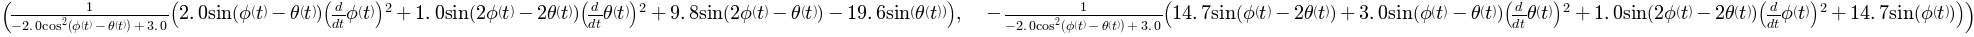

In [48]:
dpdt = p3_eq.subs({L1: lon1, L2:lon2, m1: ma1, m2: ma2, g: gr  })
dqdt = p4_eq.subs({L1: lon1, L2:lon2, m1: ma1, m2: ma2, g: gr  })
dpdt,dqdt

La ecuación de movimiento del pendulo doble No puede ser calculada [analíticamente](http://www.physics.usyd.edu.au/~wheat/preprints/DynamicsDoublePendulum.pdf) Para obtener las posiciones de las masas utilizo el método [Runge-Kutta](http://www.myphysicslab.com/runge_kutta.html) creando 4 ecuaciónes de primer orden y no dos ecuaciones de segundo orden

In [49]:
def equations(ti, T, args):
    #defino las ecuaciones de pendulo doble
    a0 = T[0] # Angulo theta
    ao = T[1] # Angulo Phi
    d0 = T[2] # Velocidad angular theta
    do = T[3] # Velocidad angular Phi
    p_t = d0
    q_t = do
    dpdt_t = dpdt.subs({ theta(t): a0, phi(t): ao, sym.diff(phi(t),t): p_t, sym.diff(theta(t),t):q_t  })
    dqdt_t = dqdt.subs({ theta(t): a0, phi(t): ao, sym.diff(phi(t),t): p_t, sym.diff(theta(t),t):q_t  })
    return [p_t, q_t, dpdt_t, dqdt_t]

In [50]:
def calculate_trajectory(args,time,y0):
    #solución numérica
    t0,t1,dt = time
    r = ode(equations).set_integrator('dopri5')
    r.set_initial_value(y0, t0).set_f_params(args)
    data=[[t0, y0[0], y0[1], y0[2], y0[3] ]]
    while r.successful() and r.t < t1:
        r.integrate(r.t+dt)
        data.append([r.t, r.y[0], r.y[1], r.y[2], r.y[3] ])
    return np.array(data)

In [51]:
def from_angle_to_xy(args,angles):
    #Convierte angulos en las posiciones x,y 
    lon1,lon2,ma1,ma2,gr = args
    time,thetas1,thetas2 = angles.T
    X1 =  lon1*np.sin(thetas1)
    X2 =  lon2*np.sin(thetas2) + X1
    Y1 = -lon1*np.cos(thetas1)
    Y2 = -lon2*np.cos(thetas2) + Y1
    #print(X1,X2,Y1,Y2)
    return np.array([time,X1,Y1,X2,Y2]).T

In [52]:
def plot_last_seconds(data,index):
    how_long = 1.0 # seconds
    n = int(how_long/time[2])
    to_plot = data[:index,:]
    if index < n:
        prepend =  np.tile(data[0],(n-index,1))
        to_plot = np.vstack([prepend,to_plot])
        index = n
    colormap = plt.cm.Greys_r
    colors = [colormap(i) for i in np.linspace(0.0, 1.0, n-1)]
    plots = []
    for j in np.arange(n-1):
        p, = ax.plot(to_plot[index-j-1:index-j+1,3],to_plot[index-j-1:index-j+1,4],
                color=colors[j])
        plots.append(p)
    return plots

In [53]:
d = calculate_trajectory(args,time,ic)
data_TXY = from_angle_to_xy(args,d[:,:3])
len(data_TXY)

[  0.00000000e+00   1.22464680e-16   1.00000000e+00   3.09016994e-01
   1.95105652e+00]
---****----
len: 152


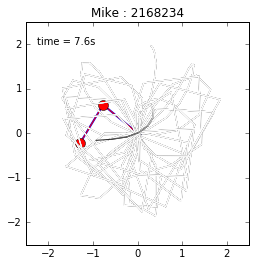

In [54]:
plt.ion()
fig = plt.figure()
ax = fig.add_subplot(111)

line, = ax.plot([], [], 'o-', lw=2)
t,x1,y1,x2,y2 = data_TXY[0]
print(data_TXY[0])
print("---****----")
line1, = ax.plot([0.0,x1], [0.0,y1], 'r-')
line2, = ax.plot([x1,x2], [y1,y2], 'r-')
circ1, = ax.plot([x1], [y1], 'ro',markersize=10)
circ2, = ax.plot([x2], [y2], 'ro',markersize=10)
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
ax.axis([-2.5,2.5,-2.5,2.5])
time_template = 'time = %.1fs'
plt.axes().set_aspect('equal')
dt = 0.05

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    
    pls = plot_last_seconds(data_TXY,i)
    t,x1,y1,x2,y2 = data_TXY[i]
    #print(data_TXY[i],i)
    line1.set_data([0.0,x1],[0.0,y1])
    line2.set_data([x1,x2],[y1,y2])
    circ1.set_data([x1],[y1])
    circ2.set_data([x2],[y2])
    ax.set_title("Mike : 2168234") 
    fig.canvas.draw()
    
    thisx = [0, x1, x2]
    thisy = [0, y1, y2]
    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text

print("len: " + str(len(data_TXY)))
ani = animation.FuncAnimation(fig, animate, np.arange(1, len(data_TXY)),
                              interval=25, 
                              blit=True, 
                              init_func=init)

ani.save('double_pendulum_.mp4', fps=20)
plt.show()

In [4]:
HTML('<iframe src="https://www.youtube.com/embed/pBT7i6sG4EU" allowfullscreen seamless frameBorder="0"></iframe>')

In [5]:
HTML('<iframe src="https://www.youtube.com/embed/rr8Fpb7egHI" allowfullscreen seamless frameBorder="0"></iframe>')